In [4]:
if (!require("igraph")) install.packages("igraph")
library("igraph")

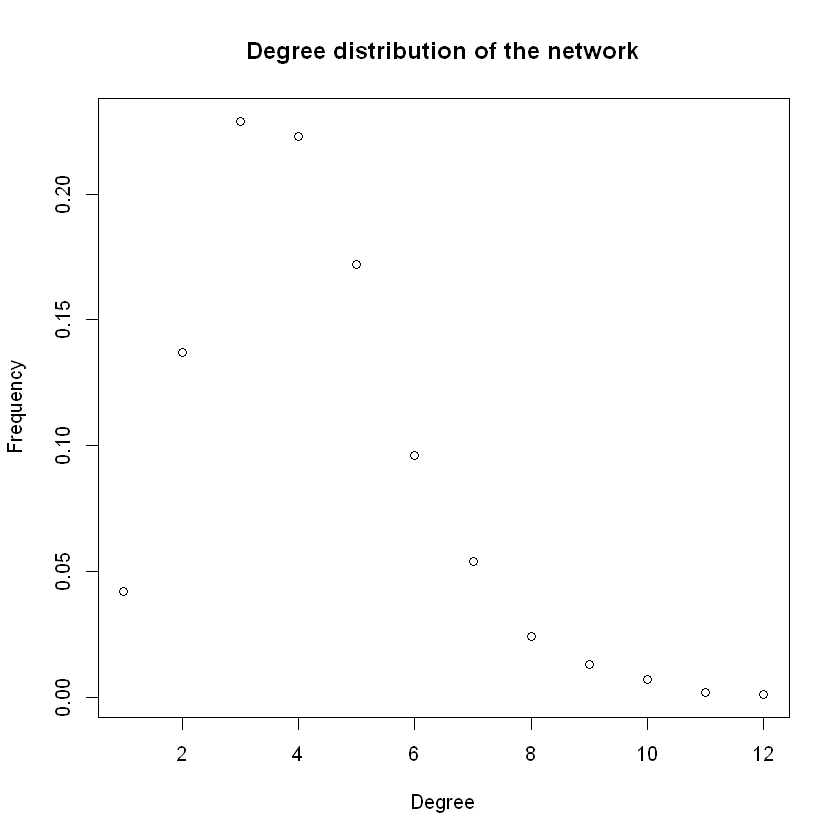

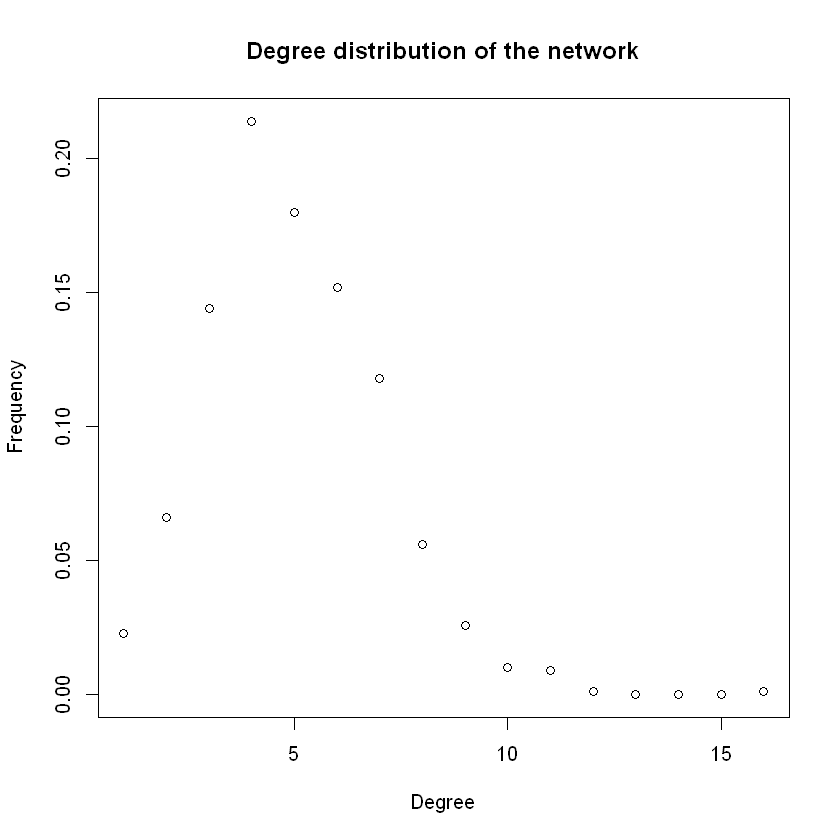

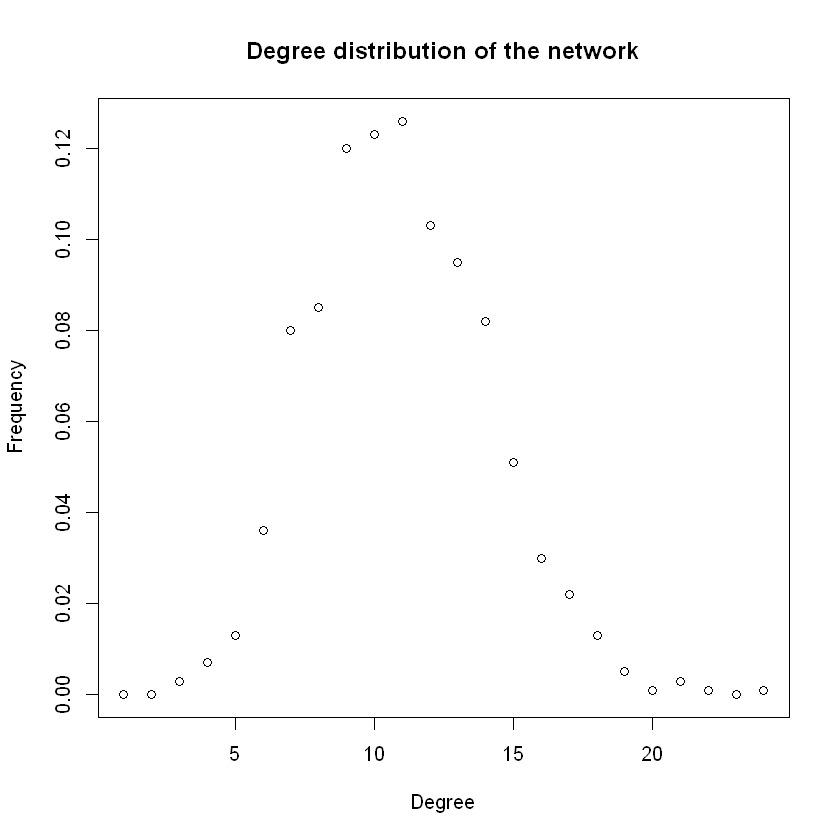

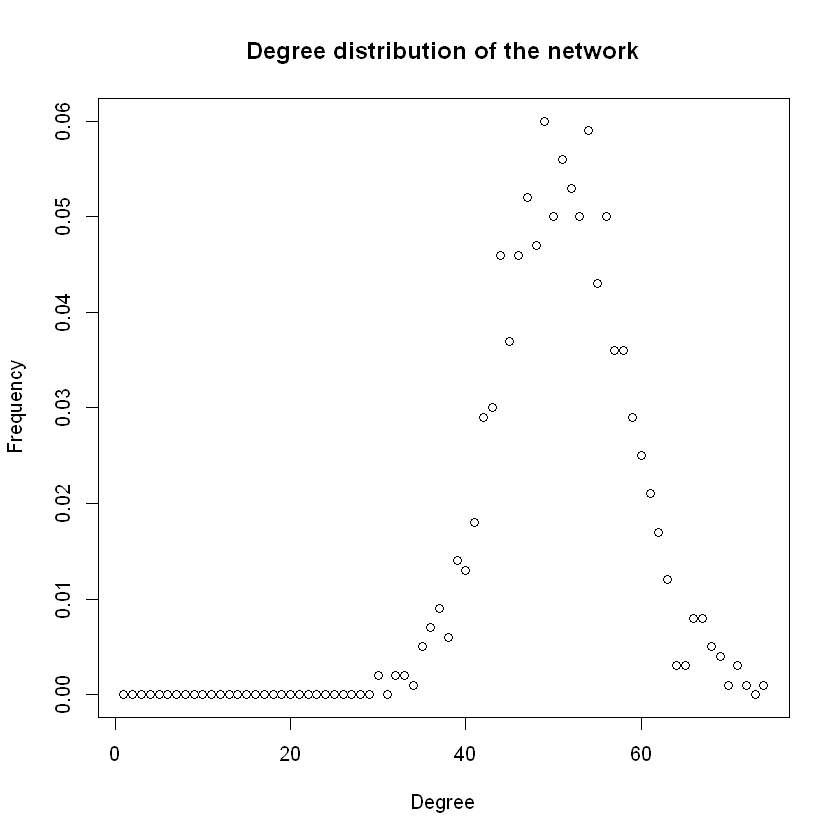

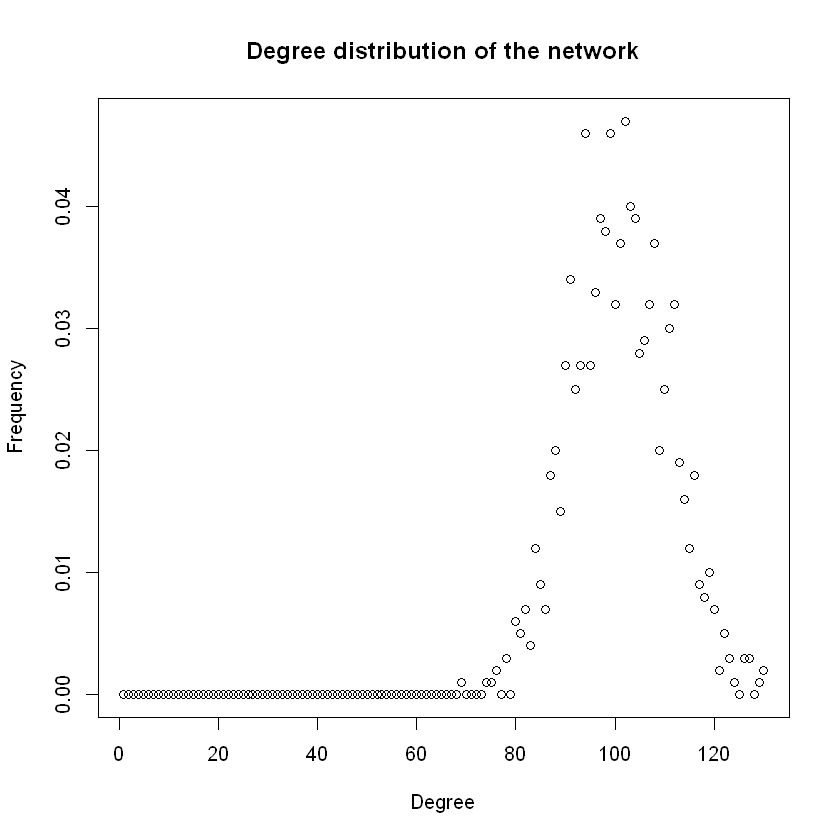

In [5]:
set.seed(0)
g1 = erdos.renyi.game(1000, p=0.003, directed=F)
g1_dist = degree.distribution(g1)
g1_mean = mean(g1_dist)
g1_var = var(g1_dist)

g2 = erdos.renyi.game(1000, p=0.004, directed=F)
g2_dist = degree.distribution(g2)
g2_mean = mean(g2_dist)
g2_var = var(g2_dist)

g3 = erdos.renyi.game(1000, p=0.01, directed=F)
g3_dist = degree.distribution(g3)
g3_mean = mean(g3_dist)
g3_var = var(g3_dist)

g4 = erdos.renyi.game(1000, p=0.05, directed=F)
g4_dist = degree.distribution(g4)
g4_mean = mean(g4_dist)
g4_var = var(g4_dist)

g5 = erdos.renyi.game(1000, p=0.1, directed=F)
g5_dist = degree.distribution(g5)
g5_mean = mean(g5_dist)
g5_var = var(g5_dist)

for(g in list(g1, g2, g3, g4, g5)) {
  plot(degree.distribution(g), main="Degree distribution of the network", xlab="Degree", ylab="Frequency")
}